## import packages

In [1]:
#pip install typing-extensions --upgrade

In [2]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from datetime import datetime
import seaborn as sns
from numpy import array
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
import autokeras as ak
import warnings
warnings.filterwarnings("ignore")
#import plotly.io as pio
#pio.renderers.default = 'pdf'
import panel as pn
from xgboost import XGBRegressor


pn.extension()

In [3]:
#pn.Row(date_picker.controls(jslink=True), date_picker)

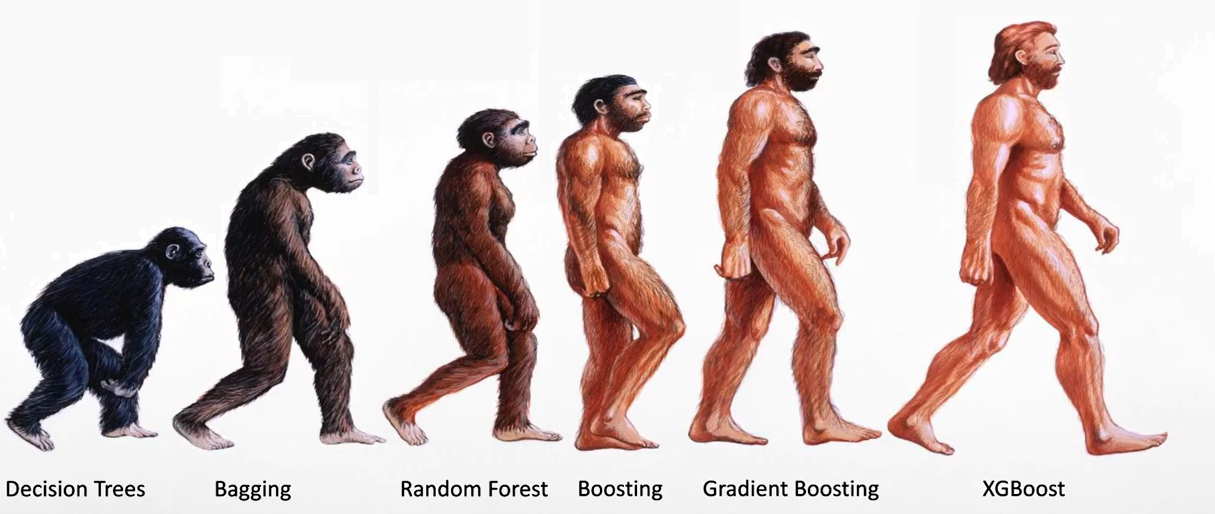


In [4]:
#pip install tensorflow
#!pip install autokeras

## load data

In [5]:
#import pandas as pd
#data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
#df = pd.read_csv(data_location + "wp_log_peyton_manning.csv")
#df.head(10)

In [6]:

#data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
#df = pd.read_csv(data_location + "wp_log_peyton_manning.csv")
#data_location = "C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/Python/Data/"
#df = pd.read_csv(data_location + "TSLA.csv")
#df=df[['Date','Close']]


In [7]:
data_location = "C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/Python/"
df = pd.read_excel(data_location + "sensordata_ED250_GE10_25-271022.xlsx")
X, y = df.iloc[:, :-2], df.iloc[:, -1]

#X=X[1430:1480]
#y=y[1430:1480]

In [8]:
X

ID
0        1
1        2
2        3
3        4
4        5
...    ...
2486  2487
2487  2488
2488  2489
2489  2490
2490  2491

[2491 rows x 1 columns]

## plot data as a preview

In [9]:
#sns.lineplot(data=df, x=df['ds'], y=df['y'])

In [10]:
fig = go.Figure()

fig.add_scatter( x=X['ID'], y=y, mode='lines', name="original")


fig.update_layout(
    
    yaxis_title='DriveCurrent',
    title='ED250',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

## Data prep

In [11]:
#(df['level_0'].values.reshape(1,-1)).shape

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [112]:
history=model = XGBRegressor(n_estimators = 500)
# fit model
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [77]:
MSE = mse(y_test, y_pred_test)
RMSE = np.sqrt(MSE)

R_squared = r2_score(y_test, y_pred_test)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("MSE: ", np.round(MSE, 2))


RMSE:  0.12

MSE:  0.01


In [78]:
#y_test.plot()

In [79]:
fig = go.Figure()

fig.add_scatter( x=X['ID'], y=y, mode='lines', name="original")

fig.add_scatter( x=X_train['ID'], y=y_pred, mode='lines', name="predict")
fig.add_scatter( x=X_test['ID'], y=y_pred_test, mode='lines', name="predict test")

fig.update_layout(
    
    yaxis_title='DriveCurrent',
    title='ED250',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

## save and load model

In [90]:
file_name = "xgb_reg.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
model_loaded = pickle.load(open(file_name, "rb"))

y_pred_load=model_loaded.predict(X_test)

In [92]:
fig = go.Figure()

fig.add_scatter( x=X['ID'], y=y, mode='lines', name="original")
fig.add_scatter( x=X['ID'], y=y_pred, mode='lines', name="forecast")
fig.add_scatter( x=X_test['ID'], y=y_pred_load, mode='lines', name="forecast")

fig.update_layout(
    
    yaxis_title='DriveCurrent',
    title='ED250',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

In [108]:
y_anomaly=y_pred_load-y_test

for i in range(len(y_anomaly)):
    if y_anomaly.iloc[i]>=0.3:
        y_anomaly.iloc[i]=y_test.iloc[i]
    else:
        y_anomaly.iloc[i]=np.nan

In [109]:
#for items in y_anomaly.iteritems():
    #print(items)

In [110]:
fig = go.Figure()

fig.add_scatter( x=X['ID'], y=y, mode='lines', name="original")
fig.add_scatter( x=X_test['ID'], y=y_pred_load, mode='lines', name="forecast")
fig.add_scatter( x=X_test['ID'], y=y_anomaly, mode='markers', name="anomaly",
                marker=dict(
            color='purple',
            size=10,
            line=dict(
                color='Red',
                width=1
            )))

fig.update_layout(
    
    yaxis_title='DriveCurrent',
    title='ED250',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()